In [ ]:
# Stock Prediction using LSTM.

In [ ]:
pip install yfinance


ERROR: Operation cancelled by user


In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import datetime
start_date = '2015-01-01'
end_date = datetime.now()
import yfinance as yf

In [ ]:
df = yf.download('RELIANCE.NS', start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,438.988831,441.812073,437.676270,439.781311,416.517548,1367720
2015-01-02,439.880371,443.818054,437.998199,438.617340,415.415131,3383424
2015-01-05,438.344940,441.267212,432.946106,433.812897,410.864868,4662967
2015-01-06,430.915344,432.401276,412.093750,414.124512,392.217957,8596809
2015-01-07,414.619812,425.367950,414.570282,423.139069,400.755707,9562421
...,...,...,...,...,...,...
2023-10-31,2328.000000,2328.000000,2282.899902,2287.899902,2287.899902,6404219
2023-11-01,2289.149902,2317.500000,2275.199951,2297.399902,2297.399902,5154595
2023-11-02,2313.949951,2324.300049,2307.949951,2320.199951,2320.199951,5281052


In [ ]:
ma_100_days = df.Close.rolling(100).mean()

Text(0, 0.5, 'Closing Price')

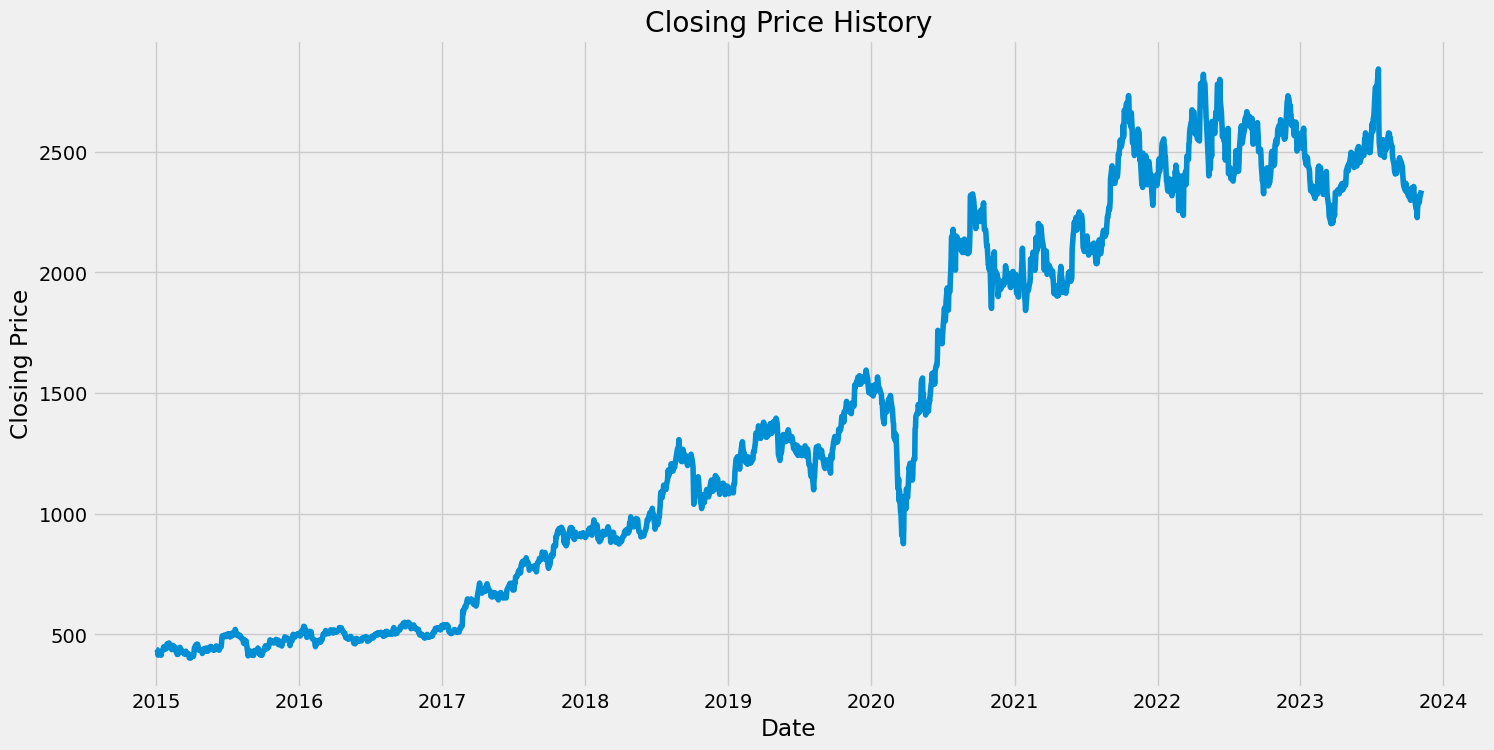

In [ ]:
#visualizing the closing price history
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')

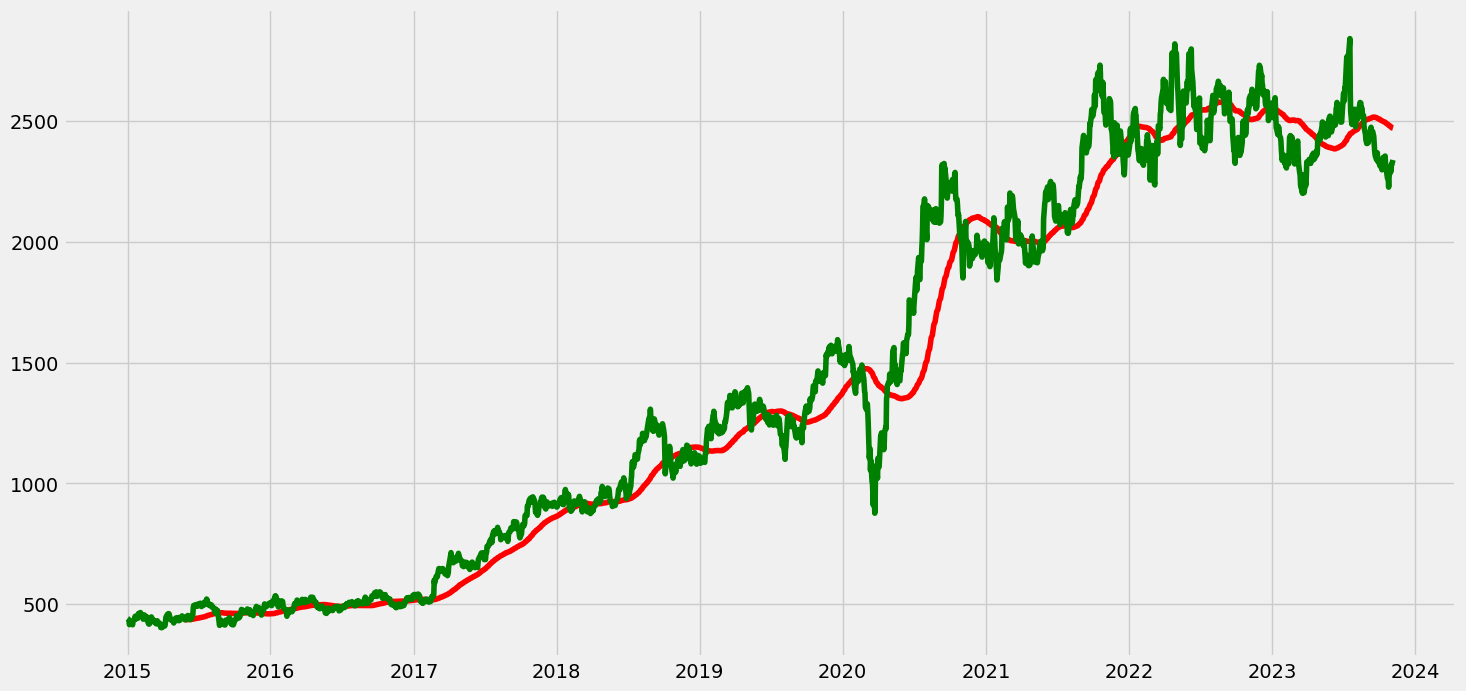

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(ma_100_days, 'r')
plt.plot(df.Close, 'g')
plt.show()

In [ ]:
ma_200_days = df.Close.rolling(200).mean()

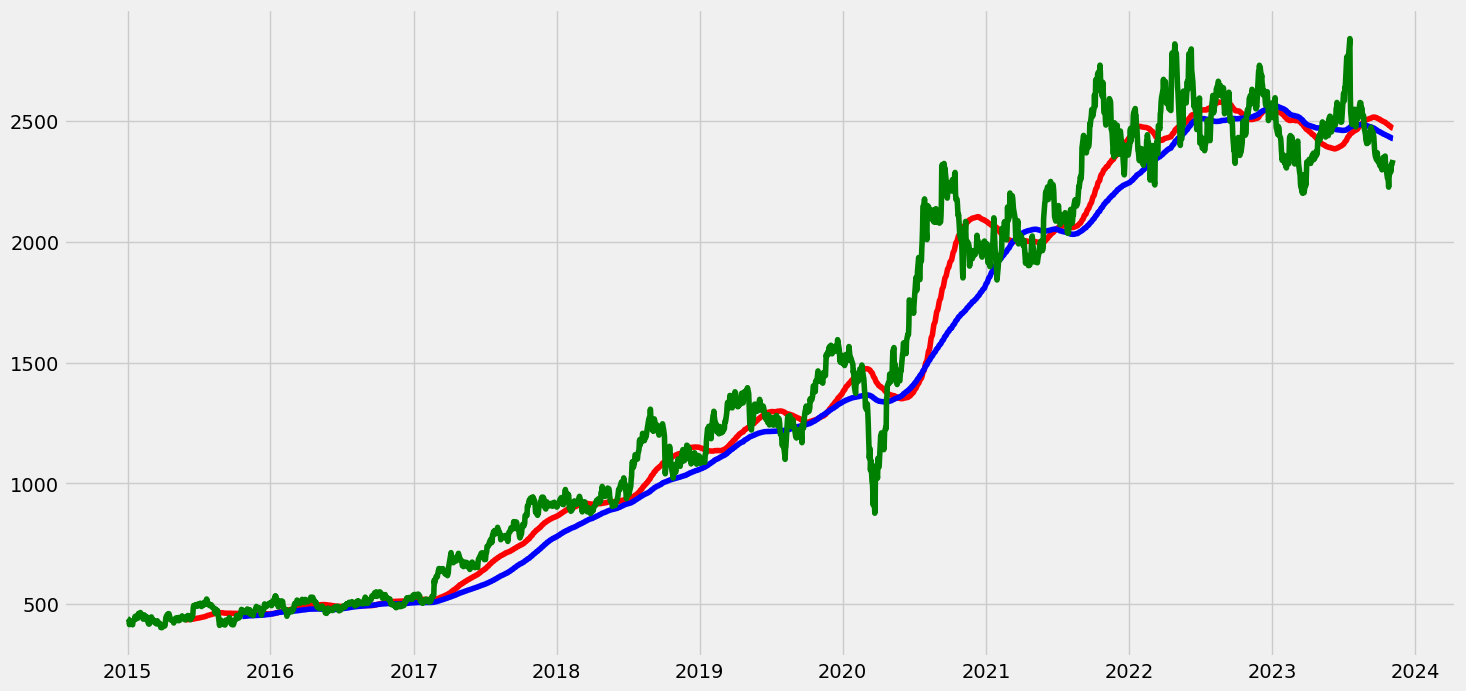

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(df.Close,'g')
plt.show()

In [ ]:
# Considering only Close Column for traing dataset
data= df.filter(['Close'])
dataset= data.values
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

1748

In [ ]:
#preprocessing the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01565916],
       [0.01518218],
       [0.01321337],
       ...,
       [0.78623362],
       [0.78602873],
       [0.79393767]])

In [ ]:
# Training dataset
train_data = scaled_data [0:training_data_len, :]
x_train = []
y_train = []

for i in range(100, len(train_data)):
  x_train.append(train_data[i-100:i,0])
  y_train.append(train_data[i,0])
  if i<=100:
    print(x_train)
    print(y_train)
    print()



[array([0.01565916, 0.01518218, 0.01321337, 0.0051453 , 0.00883936,
       0.00635296, 0.01005718, 0.00802747, 0.00657624, 0.00491188,
       0.01085891, 0.0119651 , 0.01398465, 0.01873417, 0.01948515,
       0.01481684, 0.0154562 , 0.01589258, 0.01950545, 0.02408243,
       0.02121041, 0.01974902, 0.0257468 , 0.02396065, 0.02292551,
       0.02012451, 0.0174453 , 0.01446164, 0.01825719, 0.01997229,
       0.02166709, 0.01868342, 0.01845001, 0.0185312 , 0.0126552 ,
       0.00826089, 0.00623118, 0.00657624, 0.00634282, 0.00909308,
       0.01085891, 0.01827748, 0.01564902, 0.0150604 , 0.01195496,
       0.00982376, 0.00917426, 0.01076757, 0.00798688, 0.00636312,
       0.00935694, 0.01175199, 0.00921486, 0.00879877, 0.00633267,
       0.00755049, 0.00693143, 0.0037651 , 0.00019281, 0.        ,
       0.0030953 , 0.00513515, 0.00282129, 0.00448564, 0.01119382,
       0.01712055, 0.01899803, 0.02268194, 0.02291536, 0.02386932,
       0.02356487, 0.01520248, 0.01333516, 0.01400495, 0.0134

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train) #numpy arrays for LSTM

In [ ]:
#Reshaping the 2D data into 3D
x_train= np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1648, 100, 1)

In [ ]:
#LSTM Model
model= Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,input_shape = ((x_train.shape[1],1))))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))

model.add(LSTM(units = 120, activation = 'relu'))

model.add(Dense(units =1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Training the model
model.fit(x_train,y_train, batch_size=1, epochs=1)

1648/1648 [==============================] - 268s 162ms/step - loss: 8.5920e-04


In [ ]:
#testing data
test_data= scaled_data[training_data_len-100:, :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range( 100, len(test_data)):
  x_test.append(test_data[i-100:i, 0])

In [ ]:
#preprocessing test data
x_test= np.array(x_test)


In [ ]:
#reshaping the data
x_test= np.reshape(x_test, (x_test.shape+(1,)))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


14/14 [==============================] - 2s 84ms/step


In [ ]:
#Root mean square error
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

108.3090289572011

<ipython-input-256-c0f1bb013b7a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


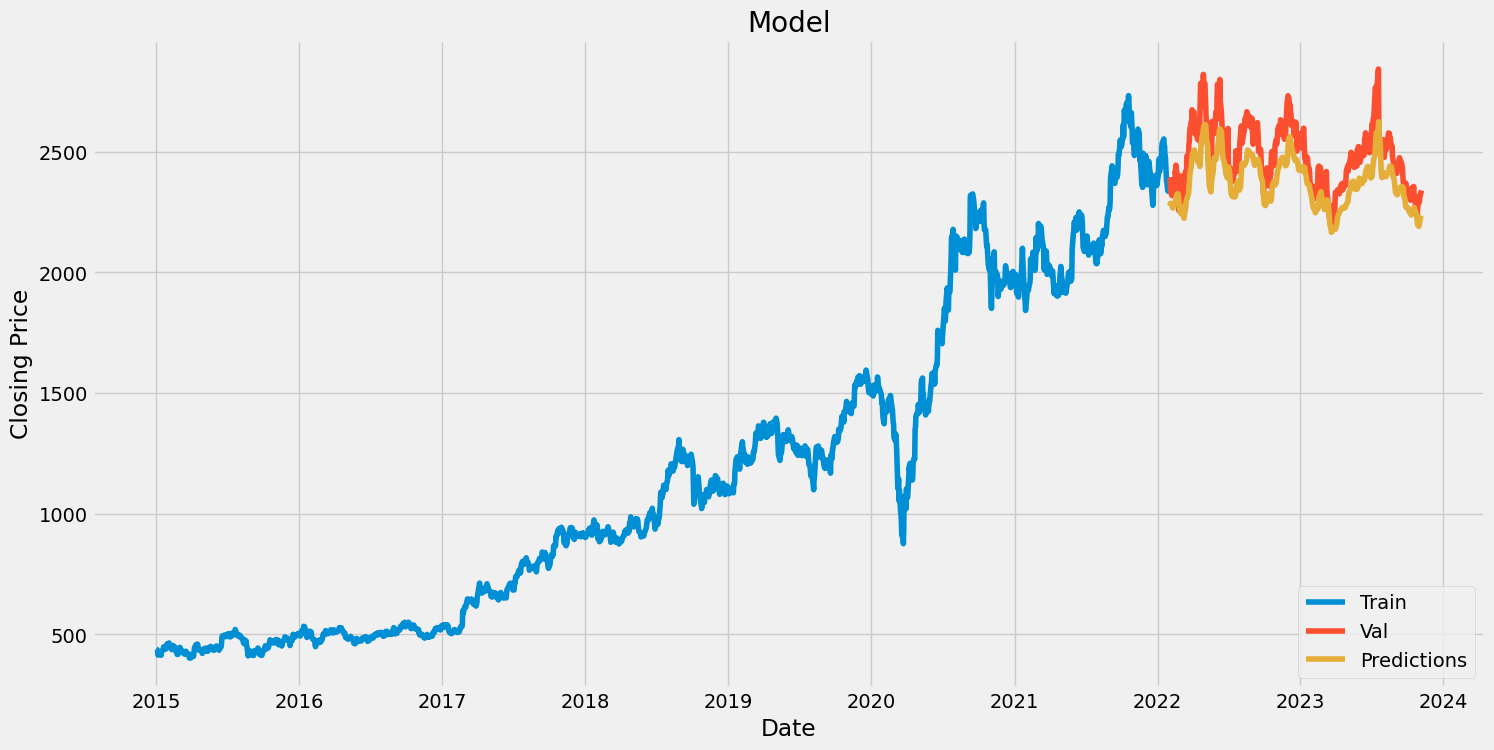

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot (train['Close'])
plt.plot (valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val','Predictions'], loc='lower right')
plt.show()

In [ ]:
#Actual Price vs Predicted Price
valid

In [ ]:
#Predict price on a day
predicted_price = yf.download('RELIANCE.NS', start=start_date, end='2023-11-01')

new_df = predicted_price.filter(['Close'])
last_100_days = new_df[-100:].values
last_100_days_scaled= scaler.transform(last_100_days)

X_test=[]
X_test.append(last_100_days_scaled)

X_test= np.array(X_test)
X_test = np.reshape (X_test, (X_test.shape[0], X_test.shape[1],1))
pred_price=model.predict(X_test)
pred_price= scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 73ms/step
[[2206.4868]]
